In [6]:
import numpy as np

# Gradient Descent + Momentum
**Gradient Descent** với **Momentum** giúp cải thiện tốc độ hội tụ và giảm thiểu khả năng mắc kẹt tại các cực tiểu cục bộ bằng cách "thêm đà" vào quá trình cập nhật. Ý tưởng là giữ lại một phần tốc độ của các bước cập nhật trước đó và sử dụng thông tin đó để điều chỉnh cập nhật hiện tại.

Công thức cập nhật trọng số trong Gradient Descent với Momentum như sau:

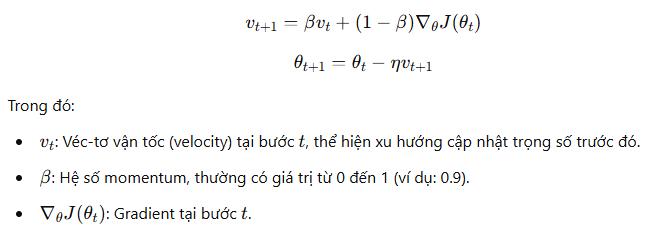

Cho function gồm hai biến như sau:

$f(w_1,w_2) = 0.1w_1^2 + 2w_2^2$

w1 = −5, w2 = −2, v1 = 0, v2 = 0, α = 0.6, β = 0.5:

với epoch = 2:


*   Bắt đầu với epoch = 1
*   **STEP1**: Tìm giá trị $dw_1$ và $dw_2$ giá trị đạo hàm của function theo $w_1$ và $w_2$

$dw_1 = 0.1 * 2 * (-5) = -1$

$dw_2 = 2 * 2 * (-2) = -8$

*   **STEP2**: Tìm giá trị $v_1$ và $v_2$ dựa vào $dw_1$ và $dw_2$ tìm được ở STEP1

$v_1 = 𝛽v_{t1-1} + (1 - 𝛽) * dw_1 = 0.5 * 0 + (1 - 0.5) * (-1) = -0.5$

$v_2 = 𝛽V_{t2-1} + (1 - 𝛽) * dw_2 = 0.5 * 0 + (1 - 0.5) * (-8) = -4$

*   **STEP3**: Dùng công thức (2.2) Gradient Descent + Momentum để cập nhật $w_1$ và $w_2$. Hoàn thành epoch = 1

$w_1 = w_1 - α *  v_{1} = -5 - 0.6 * (-0.5) = -4.7$

$w_2 = w_2 - α *  v_{2} = -2 - 0.6 * (-4) = 0.4$

*   **STEP4**: epoch = 2 ta thực hiện tương tự với STEP1, STEP2 và STEP3 như trên với $w_1$ và $w_2$ đã được cập nhật từ epoch = 1

$dw_1 = 0.1 * 2 * (-4.7) = -0.94$

$dw_2 = 2 * 2 * 0.4 = 1.6$

$v_1 = 𝛽v_{t1-1} + (1 - 𝛽) * dw_1 = 0.5 * (-0.5) + (1 - 0.5) * (-0.94) = -0.72$

$v_2 = 𝛽V_{t2-1} + (1 - 𝛽) * dw_2 = 0.5 * (-4) + (1 - 0.5) * 1.6 = -1.2$

$w_1 = w_1 - α *  v_{1} = -4.7 - 0.6 * (-0.72) = -4.268$

$w_2 = w_2 - α *  v_{2} = 0.4 - 0.6 * (-1.2) = 1.12$


In [7]:
def df_w(W):
  """
  Thực hiện tính gradient của dw1 và dw2
  Arguments:
  W -- np.array [w1, w2]
  Returns:
  dW -- np.array [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2

  """
  W = np.array(W)
  dW = np.zeros_like(W)
  dW[0] = 0.1 * 2 * W[0]
  dW[1] = 2 * 2 * W[1]
  return dW


In [8]:
def sgd_momentum(W, V, dW, lr, beta):
  V = beta * V + (1 - beta) * dW
  W = W - lr * V
  return W, V

In [12]:
def train_pl(optimizer, lr, epochs):
  # Initial point
  W = np.array([-5, -2], dtype=np.float32)
  V = np.zeros_like(W)
  beta = 0.5
  lr = 0.6

  # list of results
  results = [W]

  for epoch in range(epochs):
    dW = df_w(W)
    W, V = optimizer(W, V, dW, lr, beta)
    results.append(W)

  return results

In [13]:
train_pl(sgd_momentum, 0.6, 30)

[array([-5., -2.], dtype=float32),
 array([-4.7      ,  0.4000001], dtype=float32),
 array([-4.2679996,  1.12     ], dtype=float32),
 array([-3.7959197 ,  0.13599992], dtype=float32),
 array([-3.3321245, -0.5192   ], dtype=float32),
 array([-2.9002995 , -0.22375995], dtype=float32),
 array([-2.510369  ,  0.19247207], dtype=float32),
 array([-2.1647816 ,  0.16962159], dtype=float32),
 array([-1.862101  , -0.04534957], dtype=float32),
 array([-1.5990345 , -0.09841566], dtype=float32),
 array([-1.3715593 , -0.00684991], dtype=float32),
 array([-1.175528  ,  0.04715286], dtype=float32),
 array([-1.0069808 ,  0.01757081], dtype=float32),
 array([-0.8622883 , -0.01830519], dtype=float32),
 array([-0.7382048 , -0.01427696], dtype=float32),
 array([-0.63187075,  0.0048695 ], dtype=float32),
 array([-0.54079145,  0.00859933], dtype=float32),
 array([-4.6280432e-01,  1.4504697e-04], dtype=float32),
 array([-0.3960425 , -0.00425615], dtype=float32),
 array([-0.33889902, -0.00134937], dtype=float3